In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as XGBRegressor
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [10]:
# 1. Đọc dữ liệu đã tiền xử lý
data = pd.read_csv('data/batdongsan.csv')
print(f"Dữ liệu gồm {data.shape[0]} mẫu và {data.shape[1]} thuộc tính")
data.head()


Dữ liệu gồm 8527 mẫu và 19 thuộc tính


,detail_link,Tiêu đề,Địa chỉ,Hướng nhà,Hướng ban công,Diện tích (m2),Mức giá,Số phòng ngủ (phòng),Số phòng tắm (phòng),Mặt tiền (m),Đường vào (m),Pháp lý,Nội thất,Nội thất đầy đủ,Số tầng (tầng),Nội thất cơ bản,Nội thất trống,Mức giá (VNĐ),Quận/Huyện
0,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"Chính chủ cần bán căn góc 2PN + 1, 2WC tòa S2 ...","Dự án The Sapphire 2 - Vinhomes Ocean Park, Xã...",NaN,NaN,67.9,"{'value': 3450000000.0, 'unit': 'VNĐ'}",2.0,2.0,NaN,NaN,Sổ đỏ/ Sổ hồng,Đầy đủ,True,NaN,NaN,NaN,3.450000e+09,Gia Lâm
1,https://batdongsan.com.vn/ban-nha-rieng-duong-...,Bán nhà Tây Sơn - Thịnh Quang 148m2*Mặt tiền 8...,"Đường Tây Sơn, Phường Thịnh Quang, Đống Đa, H...",Đông - Bắc,Đông - Bắc,98.0,"{'value': 18900000000.0, 'unit': 'VNĐ'}",6.0,4.0,8.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản,NaN,4.0,True,NaN,1.890000e+10,Đống Đa
2,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,Quỹ căn siêu đẹp từ studio/1PN - 2 - 3PN tại V...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",NaN,NaN,43.0,"{'value': 2340000000.0, 'unit': 'VNĐ'}",1.0,1.0,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,NaN,NaN,2.340000e+09,Gia Lâm
3,https://batdongsan.com.vn/ban-nha-mat-pho-duon...,"Chính chủ tôi bán gấp MP An Dương Vương, Tây H...","Đường An Dương Vương, Phường Phú Thượng, Tây H...",Bắc,Bắc,123.0,"{'value': 34299999999.999996, 'unit': 'VNĐ'}",5.0,5.0,6.2,11.0,Sổ đỏ/ Sổ hồng,Đầy đủ,True,5.0,NaN,NaN,3.430000e+10,Tây Hồ
4,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,"Quỹ căn stu, 1 - 3PN Vin OCP chính chủ view đẹ...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",NaN,NaN,59.0,"{'value': 2700000000.0, 'unit': 'VNĐ'}",2.0,1.0,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN,NaN,NaN,NaN,NaN,2.700000e+09,Gia Lâm


In [11]:
# Hiển thị thông tin về các cột và kiểu dữ liệu
print("Thông tin dữ liệu:")
data.info()
print("\nCác cột trong dữ liệu:")
print(data.columns)


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8527 entries, 0 to 8526
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   detail_link           8527 non-null   object 
 1   Tiêu đề               8527 non-null   object 
 2   Địa chỉ               8527 non-null   object 
 3   Hướng nhà             2787 non-null   object 
 4   Hướng ban công        2486 non-null   object 
 5   Diện tích (m2)        8527 non-null   float64
 6   Mức giá               8527 non-null   object 
 7   Số phòng ngủ (phòng)  6207 non-null   float64
 8   Số phòng tắm (phòng)  5809 non-null   float64
 9   Mặt tiền (m)          3484 non-null   float64
 10  Đường vào (m)         2937 non-null   float64
 11  Pháp lý               7792 non-null   object 
 12  Nội thất              5401 non-null   object 
 13  Nội thất đầy đủ       3652 non-null   object 
 14  Số tầng (tầng)        3641 non-null   float64
 15  Nộ

In [12]:
# 2. Chuẩn bị dữ liệu cho mô hình
# Chọn các đặc trưng và biến mục tiêu
features = ['Diện tích (m2)', 'Quận/Huyện', 'Số tầng (tầng)', 'Số phòng tắm (phòng)', 'Số phòng ngủ (phòng)']
target = 'Mức giá (VNĐ)'

X = data[features]
y = data[target]

# Phân chia tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập huấn luyện: {X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")


Kích thước tập huấn luyện: (6821, 5)
Kích thước tập kiểm tra: (1706, 5)


In [13]:
# 3. Xây dựng pipeline tiền xử lý
# Xác định các cột số và cột hạng mục
numeric_features = ['Diện tích (m2)', 'Số tầng (tầng)', 'Số phòng tắm (phòng)', 'Số phòng ngủ (phòng)']
categorical_features = ['Quận/Huyện']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [14]:

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor.XGBRegressor(objective='reg:squarederror', random_state=42))
])
print("\nBắt đầu huấn luyện mô hình...")
model_pipeline.fit(X_train, y_train)
print("Huấn luyện mô hình hoàn tất.")



Bắt đầu huấn luyện mô hình...
Huấn luyện mô hình hoàn tất.


In [15]:
# 5. Đánh giá mô hình trên tập kiểm tra
predictions = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nĐánh giá mô hình trên tập kiểm tra:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 ): {r2:.2f}")



Đánh giá mô hình trên tập kiểm tra:
Mean Squared Error (MSE): 14898282863527968768.00
Mean Absolute Error (MAE): 2448241039.31
R-squared (R2 ): 0.68


In [16]:
# 6. Tạo hàm dự đoán giá

def predict_price(area, district, num_floors=None, bathrooms=None, bedrooms=None):
    """
    Dự đoán giá bất động sản dựa trên các thông tin đầu vào.
    Các tham số num_floors, bathrooms, bedrooms có thể để trống (None).
    """
    input_data = pd.DataFrame({
        'Diện tích (m2)': [area],
        'Quận/Huyện': [district],
        'Số tầng (tầng)': [num_floors if num_floors is not None else np.nan],
        'Số phòng tắm (phòng)': [bathrooms if bathrooms is not None else np.nan],
        'Số phòng ngủ (phòng)': [bedrooms if bedrooms is not None else np.nan]
    }, columns=features) # Đảm bảo thứ tự cột

    predicted_price = model_pipeline.predict(input_data)
    return predicted_price[0]


In [17]:

example_1_price = predict_price(area=100, district='Ba Đình', num_floors=3, bathrooms=2, bedrooms=3)
print(f"\nDự đoán giá cho trường hợp 1 (đủ thông tin): {example_1_price:.2f}")
example_2_price = predict_price(area=80, district='Cầu Giấy', bathrooms=1)
print(f"Dự đoán giá cho trường hợp 2 (thiếu số tầng, phòng ngủ): {example_2_price:.2f}")
example_3_price = predict_price(area=50, district='Đống Đa')
print(f"Dự đoán giá cho trường hợp 3 (chỉ có diện tích, quận): {example_3_price:.2f}")

example_4_price = predict_price(area=70, district='Hà Đông', num_floors=4, bathrooms=2, bedrooms=2)
print(f"Dự đoán giá cho trường hợp 4 (quận Hà Đông): {example_4_price:.2f}")



Dự đoán giá cho trường hợp 1 (đủ thông tin): 26685038592.00
Dự đoán giá cho trường hợp 2 (thiếu số tầng, phòng ngủ): 5771209728.00
Dự đoán giá cho trường hợp 3 (chỉ có diện tích, quận): 14219317248.00
Dự đoán giá cho trường hợp 4 (quận Hà Đông): 11281788928.00


MODEL EVALUATION METRICS
Metric                    Training Set    Test Set       
--------------------------------------------------
MSE                       8480849652566894592.00 14898282863527968768.00
RMSE                      2912189838.00   3859829382.70  
MAE                       1879020865.14   2448241039.31  
MAPE (%)                  23.32           32.65          
R²                        0.8097          0.6841         

5-Fold Cross-Validation R² Scores: [0.65762392 0.65062264 0.61707608 0.66571606 0.58290673]
Mean CV R²: 0.6348 (±0.0308)

Feature Importance:
1. Quận/Huyện_Sóc Sơn: 0.1124
2. Quận/Huyện_Quốc Oai: 0.0932
3. Quận/Huyện_Chương Mỹ: 0.0895
4. Quận/Huyện_Thạch Thất: 0.0860
5. Số phòng tắm (phòng): 0.0587
6. Quận/Huyện_Sơn Tây: 0.0526
7. Quận/Huyện_Cầu Giấy: 0.0501
8. Quận/Huyện_Mỹ Đức: 0.0428
9. Quận/Huyện_Tây Hồ: 0.0337
10. Quận/Huyện_Thanh Trì: 0.0302


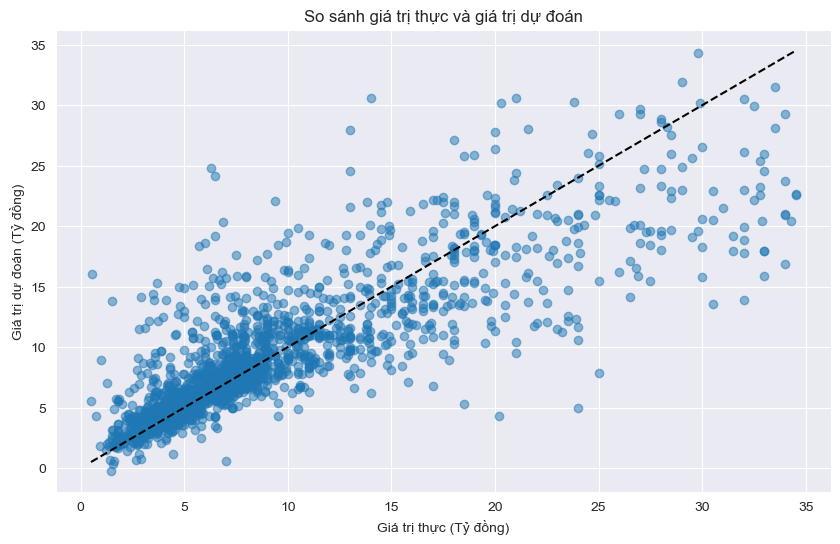

In [20]:
# Evaluate on both training and test sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training metrics
    train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)

    # Test metrics
    test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)

    # RMSE (Root Mean Squared Error)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # MAPE (Mean Absolute Percentage Error)
    train_mape = np.mean(np.abs((y_train - train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Print results
    print("=" * 50)
    print("MODEL EVALUATION METRICS")
    print("=" * 50)
    print(f"{'Metric':<25} {'Training Set':<15} {'Test Set':<15}")
    print("-" * 50)
    print(f"{'MSE':<25} {train_mse:<15.2f} {test_mse:<15.2f}")
    print(f"{'RMSE':<25} {train_rmse:<15.2f} {test_rmse:<15.2f}")
    print(f"{'MAE':<25} {train_mae:<15.2f} {test_mae:<15.2f}")
    print(f"{'MAPE (%)':<25} {train_mape:<15.2f} {test_mape:<15.2f}")
    print(f"{'R²':<25} {train_r2:<15.4f} {test_r2:<15.4f}")
    print("\n5-Fold Cross-Validation R² Scores:", cv_scores)
    print(f"Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

    # Extract feature importance
    regressor = model.named_steps['regressor']
    feature_names = (
        numeric_features +
        list(model.named_steps['preprocessor']
            .transformers_[1][1]
            .named_steps['onehot']
            .get_feature_names_out(categorical_features))
    )

    importances = regressor.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("\nFeature Importance:")
    for i, idx in enumerate(indices[:10]):  # Show top 10 features
        if idx < len(feature_names):
            print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test/1_000_000_000, test_pred/1_000_000_000, alpha=0.5)
    plt.plot([y_test.min()/1_000_000_000, y_test.max()/1_000_000_000], [y_test.min()/1_000_000_000, y_test.max()/1_000_000_000], 'k--')
    plt.xlabel('Giá trị thực (Tỷ đồng)')
    plt.ylabel('Giá trị dự đoán (Tỷ đồng)')
    plt.title('So sánh giá trị thực và giá trị dự đoán')
    plt.show()

    return {
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_r2': train_r2, 'test_r2': test_r2,
        'cv_scores': cv_scores
    }

# Run the evaluation
metrics = evaluate_model(model_pipeline, X_train, y_train, X_test, y_test)